# Evaluating Simple Linear Regression Implementation


## Baseline Evaluation with Sklearn

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=5, random_state=42) # fake data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

### Implementing Performance Metrics

Let's implement the following performance metrics for fun:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-Squared ($R^2$)

In [4]:
def compute_mae(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

def compute_mse(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)

def compute_rmse(y_test, y_pred):
    return np.sqrt(compute_mse(y_test, y_pred))

def compute_r2(y_test, y_pred):
    ssr = np.sum((y_test - y_pred)**2) # sum squared regression
    tss = np.sum((y_test - np.mean(y_test)) ** 2) # total sum of squares
    return 1 - (ssr / tss)

In [5]:
def evaluate(model, threshold=1e-4, plot=True):
    y_pred = model.predict(X_test)

    # Compute metrics
    mae = compute_mae(y_test, y_pred)
    mse = compute_mse(y_test, y_pred)
    rmse = compute_rmse(y_test, y_pred)
    r2 = compute_r2(y_test, y_pred)

    # Test our performance metrics are accurate
    assert np.abs(mae - mean_absolute_error(y_test, y_pred)) < threshold
    assert np.abs(mse - mean_squared_error(y_test, y_pred)) < threshold
    assert np.abs(rmse - np.sqrt(mean_squared_error(y_test, y_pred))) < threshold
    assert np.abs(r2 - r2_score(y_test, y_pred)) < threshold

    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Root mean squared error: {rmse:.2f}")

    # The coefficient of determination: 1 is perfect prediction
    print(f"Coefficient of determination (R-sq): {r2:.2f}")

    if plot:
        # plotting inspo from https://github.com/AssemblyAI-Community/Machine-Learning-From-Scratch/blob/main/02%20Linear%20Regression/train.py
        cmap = plt.get_cmap('viridis')
        
        plt.figure(figsize=(8,6))
        plt.scatter(X_train, y_train, color=cmap(0.9), s=30)
        plt.scatter(X_test, y_test, color=cmap(0.5), s=30)
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
        plt.title("Simple Linear Regression on Train and Test")
        plt.show()

def plot_losses(losses):
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Mean absolute error: 4.09
Mean squared error: 26.97
Root mean squared error: 5.19
Coefficient of determination (R-sq): 0.91


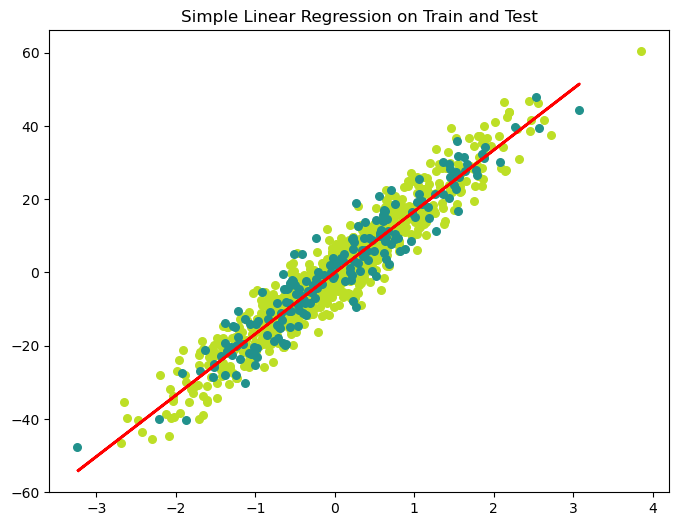

In [6]:
evaluate(baseline_model)

## Evaluating My Implementation

In [7]:
from linear_regression import LinearRegression as MyLinearRegression

In [8]:
# set seed for reproducibility
np.random.seed(0)

my_model = MyLinearRegression(epochs=1000) # default learning rate of 0.01
my_model.fit(X_train, y_train)

[Epoch 1000/1000] Loss: 23.89476


Mean absolute error: 4.09
Mean squared error: 26.97
Root mean squared error: 5.19
Coefficient of determination (R-sq): 0.91


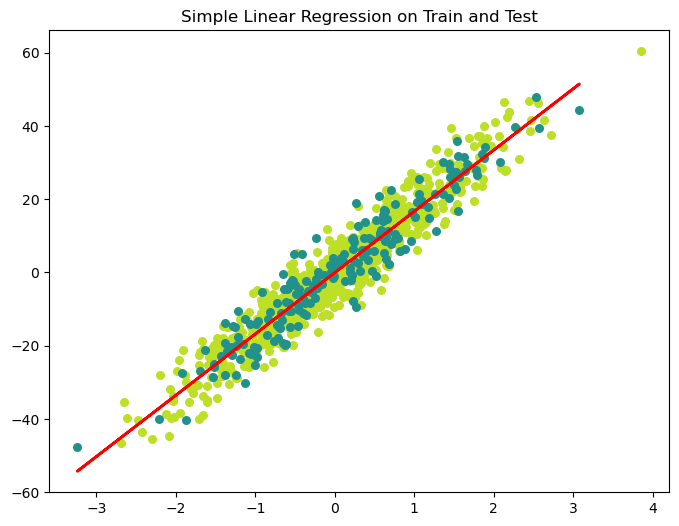

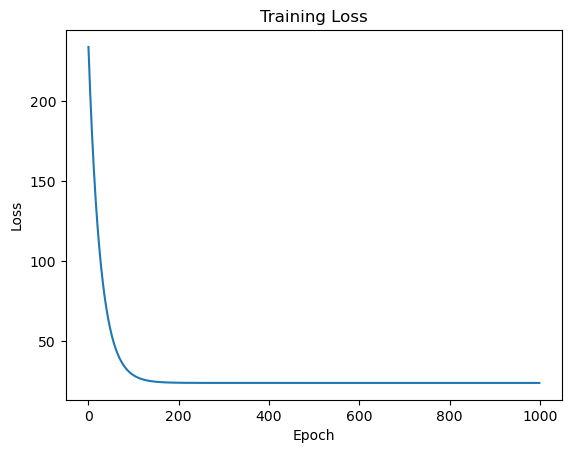

In [9]:
evaluate(my_model)
plot_losses(my_model.losses)

# Evaluating on Sklearn Diabetes Dataset (Multivariate Linear Regression)

In [10]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
evaluate(baseline_model, plot=False)

Mean absolute error: 42.79
Mean squared error: 2900.19
Root mean squared error: 53.85
Coefficient of determination (R-sq): 0.45


[Epoch 1000/20000] Loss: 5372.71038
[Epoch 2000/20000] Loss: 4871.591
[Epoch 3000/20000] Loss: 4498.94519
[Epoch 4000/20000] Loss: 4218.16414
[Epoch 5000/20000] Loss: 4003.48706
[Epoch 6000/20000] Loss: 3836.7425
[Epoch 7000/20000] Loss: 3705.07319
[Epoch 8000/20000] Loss: 3599.34713
[Epoch 9000/20000] Loss: 3513.04738
[Epoch 10000/20000] Loss: 3441.49608
[Epoch 11000/20000] Loss: 3381.3116
[Epoch 12000/20000] Loss: 3330.02849
[Epoch 13000/20000] Loss: 3285.83125
[Epoch 14000/20000] Loss: 3247.36742
[Epoch 15000/20000] Loss: 3213.61623
[Epoch 16000/20000] Loss: 3183.79612
[Epoch 17000/20000] Loss: 3157.29933
[Epoch 18000/20000] Loss: 3133.64569
[Epoch 19000/20000] Loss: 3112.44959
[Epoch 20000/20000] Loss: 3093.3965
Mean absolute error: 43.78
Mean squared error: 2907.89
Root mean squared error: 53.92
Coefficient of determination (R-sq): 0.45


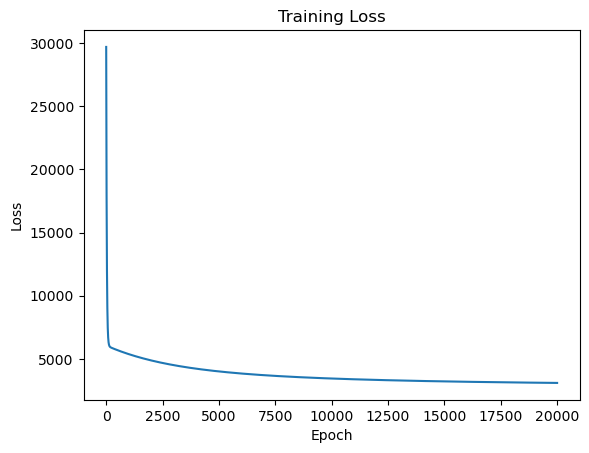

In [11]:
my_model = MyLinearRegression(epochs=20000) # default learning rate of 0.01
my_model.fit(X_train, y_train)

evaluate(my_model, plot=False)
plot_losses(my_model.losses)

# Future Work
For a more extensive evaluation of whether the model (linear regression) is appropriate you can try the following:
1. Perform a simulation study
2. Cross validation